# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# OSEMN Model
1. **OBTAIN:**
    - **Import data, inspect, check for datatypes to convert and null values**<br>
        - Display header and info
        - Drop any unneeded columns (df.drop(['col1','col2'],axis=1)

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
        - [x] Check for #'s that are store as objects (df.info())
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted
            - Decide how to deal weird/null values (df.unique(), df.isna().sum(), df.describe()-min/max, etc
        - [x]  Check for categorical variables stored as integers
    - [x] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [x] Check for multicollinearity
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and dat transformations to perform
        - Can also do kernel density estimates
    - [ ] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
        - categoricals will look like vertical lines
    - [ ] Use pd.plotting.scatter_matrix to visualize possible relationships
    - [ ] Check for linearity

   
4. **FIT AN INITIAL MODEL:** 
    - Various forms, detail later...
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
5. **Revise the fitted model**
    - Multicollinearity is big issue for lin regression and cannot fully remove it
    - Use the predictive ability of model to test it (like R2 and RMSE)
    - Check for missed non-linearity
6. **Holdout validation / Train/test split**
    - use sklearn train_test_split 
___

In [1]:
from bs_ds import *
# import bs_ds as bs

View our documentation at https://bs-ds.readthedocs.io/en/latest/bs_ds.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



In [2]:
big_pandas()
ignore_warnings()

display.max_columns=None
display.expand_frame_repr=False
display.max_rows=None
display.precision=4


# Iowa Prisoner Recidivism Data

- Source: https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- **Statistics about recidivism in prisoners from a 3 year prisoner**
- **Target:**
    - Recidivism - Return to Prison
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population

**From Kaggle Listing:**
>For recidivism prediction the full dataset containing 26021 records was used. The name of the data set is: "3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated". All the variables related to recidivism were excluded from the dataset, except the response variable: 'Recidivism - return to prison'. The response variable was turned into a numeric vector of (0,1), where 1 means 'yes recidivism' and 0 means 'no recidivism'. 
Other variables related to recidivism were of course not used in the predictive analysis. There are 26021 records in this dataset.

> Another dataset was constructed using the initial one. This dataset is called 'prison_recidivists_with_recidivism_type_only'. It contains the records of those recidivists from the initial file for whom the type of recidivism has been recorded and documented.

> This one done in order to enable the comparison between the seriousness of the initial offense and the type of recidivism. Therefore, only the records containing both types were left in this dataset, and the rest were filtered out. The second dataset containing data recidivists only is comprised of 6718 records.

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/districtmap09122014.jpg" width=400>

### **The variables in the data set:**

- Fiscal Year Released Fiscal year (year ending June 30) for which the offender was released from prison.

- Recidivism Reporting Year 
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- Race - Ethnicity 
    - Offender's Race and Ethnicity

- Convicting Offense Classification 
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- Convicting Offense Type General category for the most serious offense for which the offender was placed in prison.

- Convicting Offense Subtype 
    - Further classification of the most serious offense for which the offender was placed in prison.

- Release Type 
    - Reasoning for Offender's release from prison.

- Main Supervising District 
    - The Judicial District supervising the offender for the longest time during the tracking period.

- Recidivism - Return to Prison 
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period

- Days to Recidivism 
    - Number of days it took before the offender returned to prison.

- New Conviction Offense Classification The same as the initial offense classification.

- New Conviction Offense Type The same as the initial offense type.

- New Conviction Offense Sub Type The same as the initial offense subtype.

- Part of Target Population 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

In [3]:
# Importing custom-library of functions.
from bs_ds.bamboo import *
from bs_ds.imports import *

,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


## Loading in the Dataset

In [4]:
# Dataset Links
all_prisoners_url = 'https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/dataset/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv'
all_prisoners_file = "dataset/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv"

only_repeat_criminals_w_new_crime_url = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/dataset/prison_recidivists_with_recidivism_type_only.csv"
only_repeat_criminals_w_new_crime_file= "dataset/prison_recidivists_with_recidivism_type_only.csv"

In [5]:
# Will be using the all_prisoners file to predict recidivism
df = pd.read_csv(all_prisoners_file)

In [6]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
Fiscal Year Released                         26020 non-null int64
Recidivism Reporting Year                    26020 non-null int64
Race - Ethnicity                             25990 non-null object
Age At Release                               26017 non-null object
Convicting Offense Classification            26020 non-null object
Convicting Offense Type                      26020 non-null object
Convicting Offense Subtype                   26020 non-null object
Main Supervising District                    16439 non-null object
Release Type                                 24258 non-null object
Release type: Paroled to Detainder united    24258 non-null object
Part of Target Population                    26020 non-null object
Recidivism - Return to Prison numeric        26020 non-null int64
dtypes: int64(3), object(9)
memory usage: 2.4+ MB


None

,Fiscal Year Released,Recidivism Reporting Year,Recidivism - Return to Prison numeric
count,26020.0000,26020.0000,26020.0000
mean,2012.6008,2015.6008,0.3336
std,1.6610,1.6610,0.4715
min,2010.0000,2013.0000,0.0000
25%,2011.0000,2014.0000,0.0000
50%,2013.0000,2016.0000,0.0000
75%,2014.0000,2017.0000,1.0000
max,2015.0000,2018.0000,1.0000


,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1


### Save original names vs short names in column_legend
- then map names onto columns

In [7]:
colnames_orig = df.columns
colnames_orig

colnames_short = ('yr_released','recid_report_year','race_ethnicity','age_at_release','class_of_crime','crime_type','crime_subtype','super_district','release_type','part_target_pop','recidivism','recid_code')

column_legend = dict(zip(colnames_orig,colnames_short))
column_legend

{'Fiscal Year Released': 'yr_released',
 'Recidivism Reporting Year': 'recid_report_year',
 'Race - Ethnicity': 'race_ethnicity',
 'Age At Release ': 'age_at_release',
 'Convicting Offense Classification': 'class_of_crime',
 'Convicting Offense Type': 'crime_type',
 'Convicting Offense Subtype': 'crime_subtype',
 'Main Supervising District': 'super_district',
 'Release Type': 'release_type',
 'Release type: Paroled to Detainder united': 'part_target_pop',
 'Part of Target Population': 'recidivism',
 'Recidivism - Return to Prison numeric': 'recid_code'}

In [8]:
# Rename df with shorter names
df.rename(mapper=column_legend,axis=1,inplace=True)
df.head()

,yr_released,recid_report_year,race_ethnicity,age_at_release,class_of_crime,crime_type,crime_subtype,super_district,release_type,part_target_pop,recidivism,recid_code
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1


### Investigating Values for Each Object Column and Determining How to Handle

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
yr_released          26020 non-null int64
recid_report_year    26020 non-null int64
race_ethnicity       25990 non-null object
age_at_release       26017 non-null object
class_of_crime       26020 non-null object
crime_type           26020 non-null object
crime_subtype        26020 non-null object
super_district       16439 non-null object
release_type         24258 non-null object
part_target_pop      24258 non-null object
recidivism           26020 non-null object
recid_code           26020 non-null int64
dtypes: int64(3), object(9)
memory usage: 2.4+ MB


## ADDRESSING NULL VALUES
### Checking Null Values


In [10]:
check_null(df)

# of Identified Null Values in "Object" columns:



,Null values,Total Values,Percent
Column,,,
yr_released,0,26020,0.000
recid_report_year,0,26020,0.000
race_ethnicity,30,26020,0.115
age_at_release,3,26020,0.012
class_of_crime,0,26020,0.000
crime_type,0,26020,0.000
crime_subtype,0,26020,0.000
super_district,9581,26020,36.822
release_type,1762,26020,6.772


**Results of Null Check**
- race_ethnicity has 30 (0.12% of data)
    -  drop
- age_at_release has 3 (0.01% of data)
    - drop
- super_district has 9581(36.82% of data)
    - replace
    - with...
- release_type has 1762 (6.77% of data)
    - replace
    - with
- part_target_pop has 1762 (6.77% of data)
    - replace
    - with...
    
### Checking Columns with Nulls to Replace to Decide Method

In [11]:
# Dropping null values from 'age_at_release','race_ethnicity'
df.dropna(subset=['age_at_release','race_ethnicity'],inplace=True)

In [12]:
check_null(df)

# of Identified Null Values in "Object" columns:



,Null values,Total Values,Percent
Column,,,
yr_released,0,25987,0.000
recid_report_year,0,25987,0.000
race_ethnicity,0,25987,0.000
age_at_release,0,25987,0.000
class_of_crime,0,25987,0.000
crime_type,0,25987,0.000
crime_subtype,0,25987,0.000
super_district,9549,25987,36.745
release_type,1762,25987,6.780


In [13]:
check_unique(df, columns=['super_district','release_type','part_target_pop'])


super_district Type: object
Number unique values: 10


,super_district
5JD,4982
1JD,2787
2JD,1988
8JD,1556
7JD,1514
3JD,1188
6JD,1098
4JD,666
ISC,350
Interstate Compact,309



release_type Type: object
Number unique values: 7


,release_type
Parole,15721
Discharged End of Sentence,7342
Special Sentence,748
Paroled to Detainer - Out of State,137
Paroled to Detainer - INS,134
Paroled to Detainer - U.S. Marshall,77
Paroled to Detainer - Iowa,66



part_target_pop Type: object
Number unique values: 4


,part_target_pop
Parole,15721
Discharged End of Sentence,7342
Special Sentence,748
Paroled to Detainer,414


**Results of Null Check -> Unique Check**
- super_district has 9581(36.82% of data)
    - replace
    - with 'unknown'
- release_type has 1762 (6.77% of data)
    - replace  (_could_ consider dropping)
    - with 'unknown'
- part_target_pop has 1762 (6.77% of data)
    - replace (_could_ consider dropping)
    - with 'unknown'
    

In [14]:
df.fillna("unknown",inplace=True)
check_null(df)

# of Identified Null Values in "Object" columns:



,Null values,Total Values,Percent
Column,,,
yr_released,0,25987,0.0
recid_report_year,0,25987,0.0
race_ethnicity,0,25987,0.0
age_at_release,0,25987,0.0
class_of_crime,0,25987,0.0
crime_type,0,25987,0.0
crime_subtype,0,25987,0.0
super_district,0,25987,0.0
release_type,0,25987,0.0


## Determining how to handle/encode features
#### Notes on columns
- Numeric:
    - yr_release
    - recid_report_yr
- Ordinal:
    - age_at_release should be an ordinal label.
- All others should be LabelEncoded
    - class_of_crime
    - crime_type
    - crime_subtype
    - super_district
    - release_type
    - part_target_pop
    - ~~recidivism~~ (have 'recid_code')

In [15]:
column_legend.values()

dict_values(['yr_released', 'recid_report_year', 'race_ethnicity', 'age_at_release', 'class_of_crime', 'crime_type', 'crime_subtype', 'super_district', 'release_type', 'part_target_pop', 'recidivism', 'recid_code'])

### Lists of Vars to encode

In [16]:
# Defining lists to use later.
vars_label_encode = ['race_ethnicity','class_of_crime','crime_type', 'crime_subtype', 'super_district', 'release_type', 'part_target_pop', 'recid_code']
vars_ord_encode = ['age_at_release']

### Encoding age_at_release as Ordinal
#### Using OrdinalEncoder


In [17]:
from sklearn.preprocessing import OrdinalEncoder
ordenc = OrdinalEncoder()

In [18]:
# Checking Age Range Unique Values
age_ranges = df['age_at_release'].unique()
age_ranges

array(['Under 25', '55 and Older', '25-34', '45-54', '35-44'],
      dtype=object)

In [19]:
# Ordering age categories in a tuple and then turning into an array.
cat_codes = ('Under 25','25-34', '35-44','45-54','55 and Older')
cat_codes = np.array(cat_codes)
cat_codes

array(['Under 25', '25-34', '35-44', '45-54', '55 and Older'],
      dtype='<U12')

In [20]:
# Create copy of data to replace columns with coded columns
df_code = df.copy()

# Fitting ordinal encoder to age 
ordenc.fit(cat_codes.reshape(-1,1))

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [21]:
# print(df_code.age_at_release.value_counts()), print(df_code['age_at_release'].isna().sum())

In [22]:
df_code['age_code'] = ordenc.transform(np.array(df_code['age_at_release']).reshape(-1,1))

In [23]:
check_unique(df_code,['age_at_release','age_code'])


age_at_release Type: object
Number unique values: 5


,age_at_release
25-34,9543
35-44,6217
Under 25,4585
45-54,4340
55 and Older,1302



age_code Type: float64
Number unique values: 5


,age_code
0.0,9543
1.0,6217
4.0,4585
2.0,4340
3.0,1302


#### Encoding age_at_release by mapping a dictionary onto the columns instead.

In [24]:
df_code.head()

,yr_released,recid_report_year,race_ethnicity,age_at_release,class_of_crime,crime_type,crime_subtype,super_district,release_type,part_target_pop,recidivism,recid_code,age_code
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1,4.0
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1,3.0
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1,0.0
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1,3.0
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1,0.0


#### Creating Dictionary to Encode age_at_release

In [25]:
# Defining age range tuple
age_range = tuple(cat_codes)
age_range

('Under 25', '25-34', '35-44', '45-54', '55 and Older')

In [26]:
# Defining age_code type
age_codes = (0,1,2,3,4)

# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_range,age_codes))
age_map

{'Under 25': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55 and Older': 4}

In [27]:
df_code['age_code'] = df_code['age_at_release'].map(age_map)
check_unique(df_code,['age_at_release','age_code']) #df_code['age_code'].value_counts()


age_at_release Type: object
Number unique values: 5


,age_at_release
25-34,9543
35-44,6217
Under 25,4585
45-54,4340
55 and Older,1302



age_code Type: int64
Number unique values: 5


,age_code
1,9543
2,6217
0,4585
3,4340
4,1302


### Encoding categorical columns using LabelLibrary()


In [28]:
df_code.head(2)

,yr_released,recid_report_year,race_ethnicity,age_at_release,class_of_crime,crime_type,crime_subtype,super_district,release_type,part_target_pop,recidivism,recid_code,age_code
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1,0
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1,4


In [29]:
# Reminder about what columns are contained in vars_label_encode
vars_label_encode

['race_ethnicity',
 'class_of_crime',
 'crime_type',
 'crime_subtype',
 'super_district',
 'release_type',
 'part_target_pop',
 'recid_code']

In [30]:
lablib = LabelLibrary()
df_code = lablib.fit_transform(df_code,vars_label_encode)

df_code.head()

,yr_released,recid_report_year,race_ethnicity,age_at_release,class_of_crime,crime_type,crime_subtype,super_district,release_type,part_target_pop,recidivism,recid_code,age_code
0,2010,2013,10,Under 25,4,4,3,3,1,1,Yes,1,0
1,2010,2013,10,55 and Older,4,3,10,6,1,1,Yes,1,4
2,2010,2013,10,25-34,4,2,4,4,1,1,Yes,1,1
3,2010,2013,10,55 and Older,3,0,23,7,1,1,Yes,1,4
4,2010,2013,6,25-34,4,0,23,2,1,1,Yes,1,1


In [31]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25987 entries, 0 to 26019
Data columns (total 13 columns):
yr_released          25987 non-null int64
recid_report_year    25987 non-null int64
race_ethnicity       25987 non-null int32
age_at_release       25987 non-null object
class_of_crime       25987 non-null int32
crime_type           25987 non-null int32
crime_subtype        25987 non-null int32
super_district       25987 non-null int32
release_type         25987 non-null int32
part_target_pop      25987 non-null int32
recidivism           25987 non-null object
recid_code           25987 non-null int64
age_code             25987 non-null int64
dtypes: int32(7), int64(4), object(2)
memory usage: 2.1+ MB


# EDA

(<Figure size 1008x720 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FC505D0B8>,
       dtype=object))

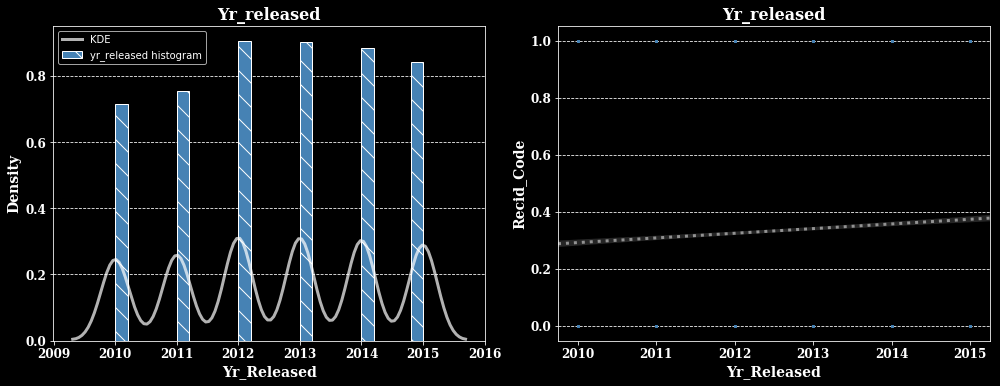

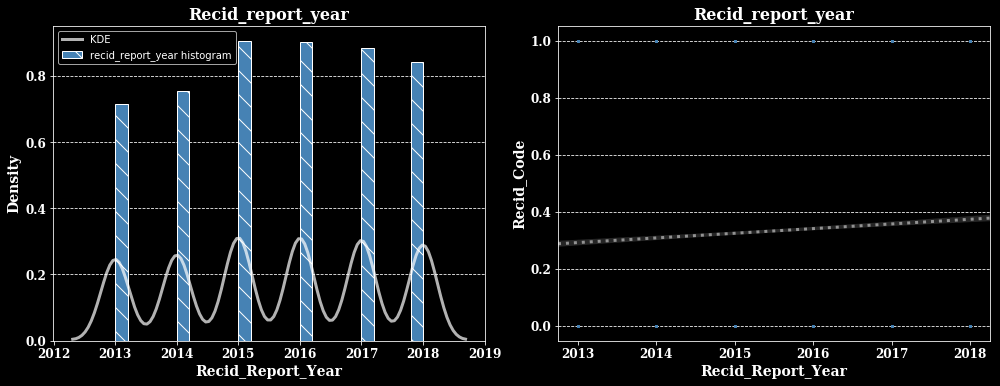

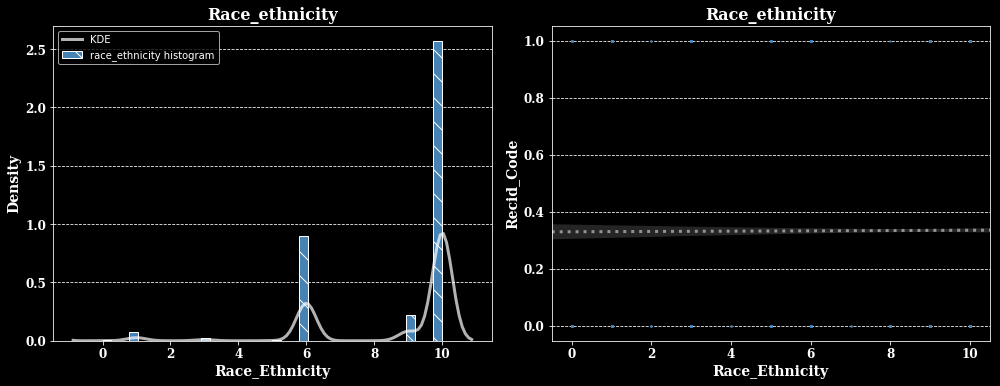

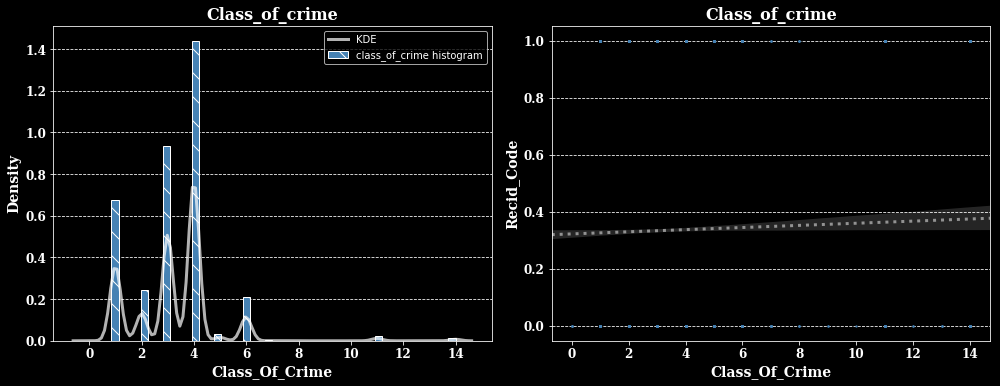

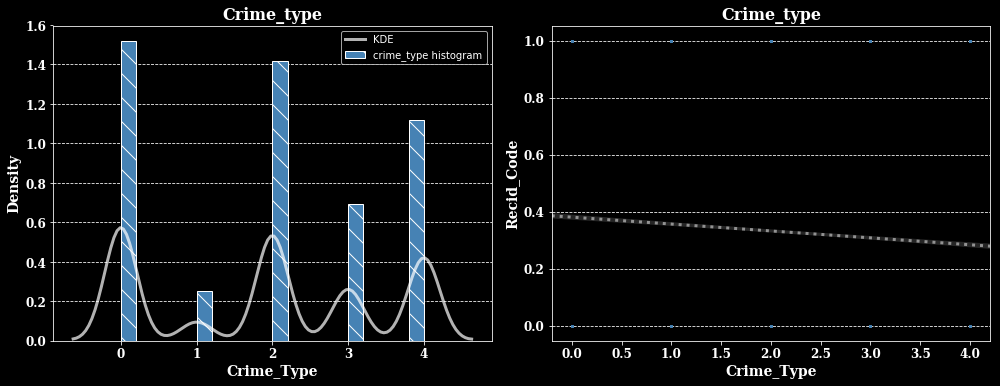

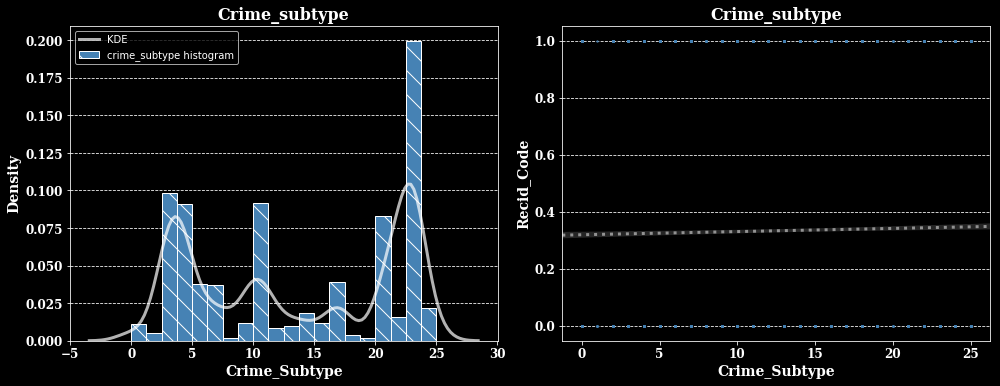

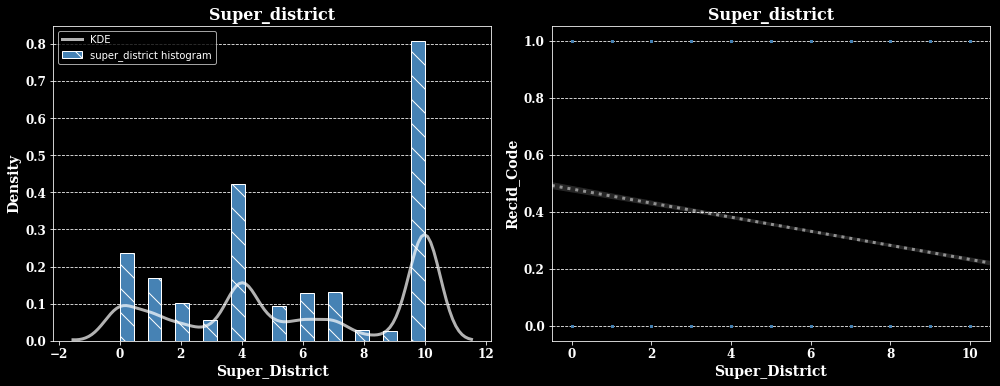

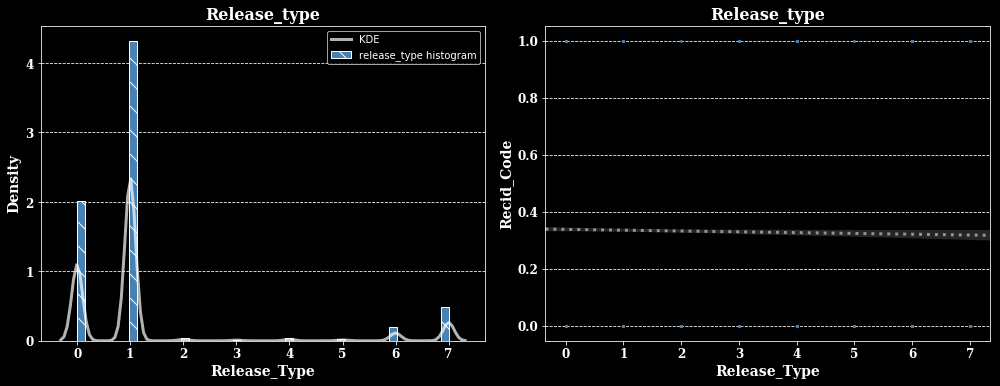

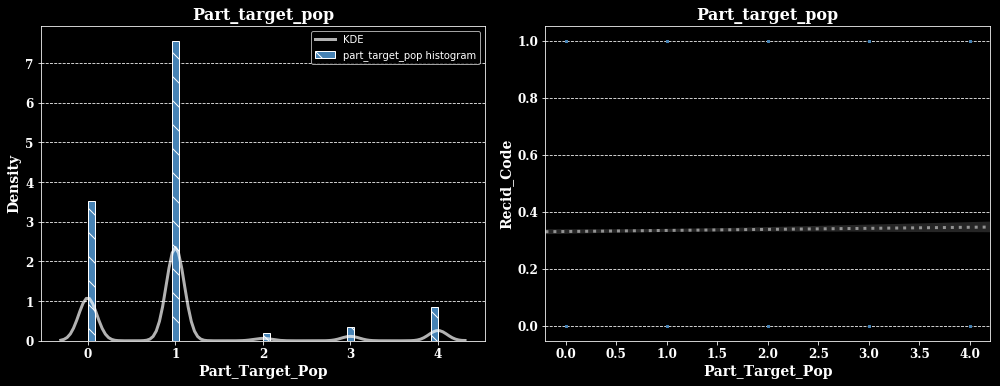

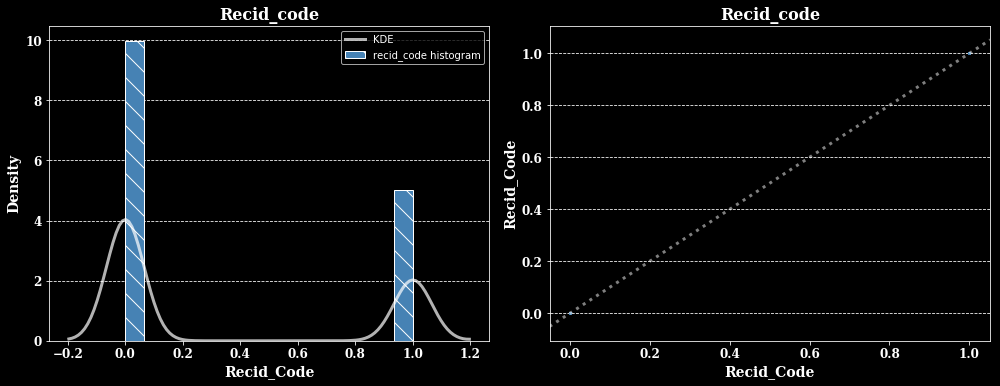

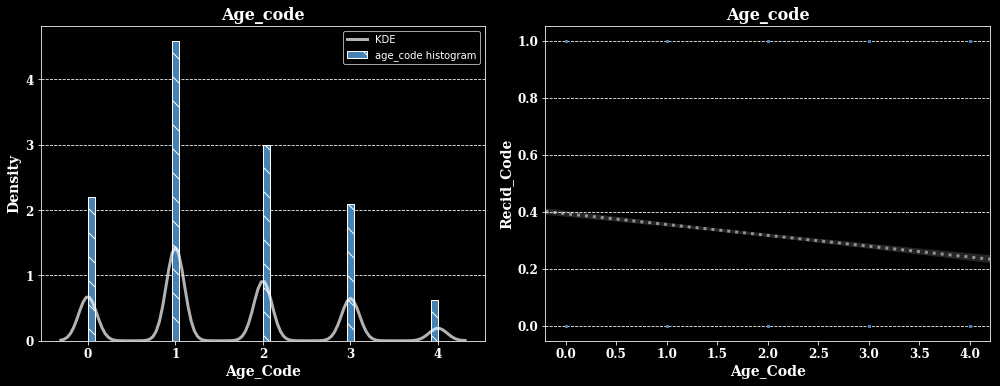

In [32]:
plot_hist_scat(df_code.drop('age_at_release',axis=1),'recid_code')

(<Figure size 1152x1152 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27fc4be9780>)

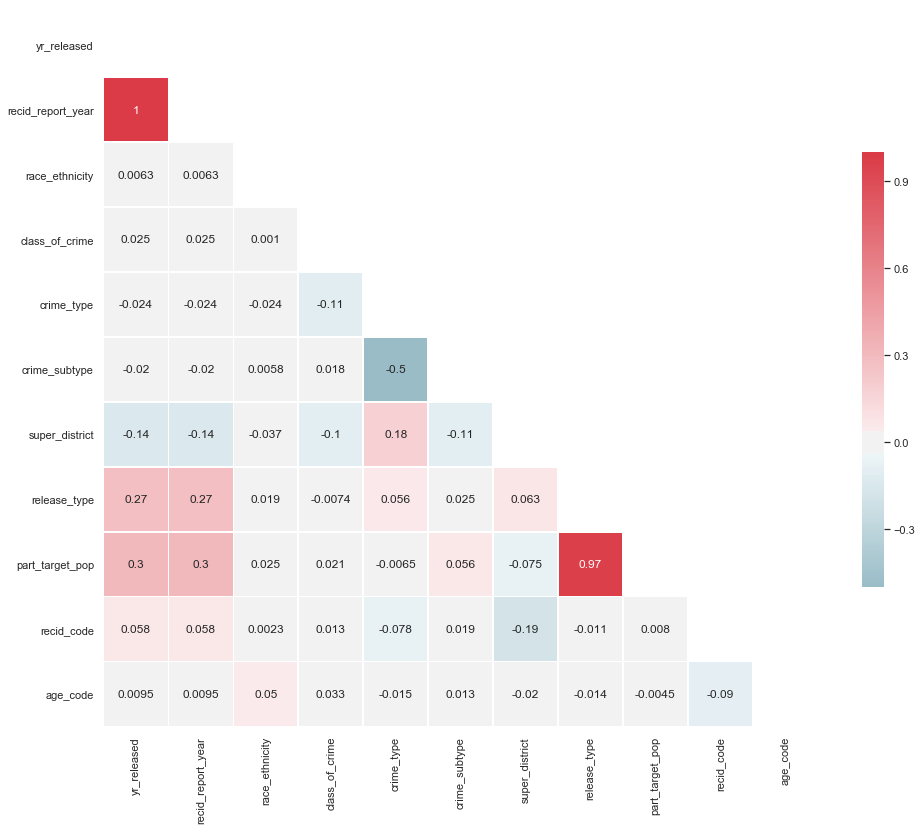

In [33]:
multiplot(df_code)

## Comments on Data 

In [34]:
# df_code.drop(['recidivism','age_at_release'],axis=1,inplace=True)
df_code.drop('recidivism',axis=1,inplace=True)

# Preprocessing for Modeling

In [35]:
from bs_ds import *

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

In [42]:
X = df_code.drop(['recid_code','age_at_release'],axis=1)
y = df_code.recid_code

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [39]:
stop

NameError: name 'stop' is not defined

## Baseline Classifier


In [48]:
X.info(), y.dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25987 entries, 0 to 26019
Data columns (total 10 columns):
yr_released          25987 non-null int64
recid_report_year    25987 non-null int64
race_ethnicity       25987 non-null int32
class_of_crime       25987 non-null int32
crime_type           25987 non-null int32
crime_subtype        25987 non-null int32
super_district       25987 non-null int32
release_type         25987 non-null int32
part_target_pop      25987 non-null int32
age_code             25987 non-null int64
dtypes: int32(7), int64(3)
memory usage: 1.5 MB


(None, dtype('int64'))

In [54]:
clf_xgb = xgboost.XGBClassifier()
clf_gbc = GradientBoostingClassifier()

In [55]:
thick_pipe(X,y,8,verbose=True,classifiers=[clf_xgb,clf_gbc])

TypeError: 'XGBClassifier' object is not callable

In [ ]:
tree_clf.get_params()

In [ ]:
params={'max_depth':5}
tree_clf.set_params(**params)

In [ ]:
tree_clf.fit(X_train, y_train)

In [ ]:
tree_clf.feature_importances_


In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [ ]:
import os
import sys
sys.path.append('C:\\Program\ Files\ \(x86\)\\Graphviz2.38\\bin')

In [ ]:
from bs_ds import *

In [ ]:

viz_tree(tree_clf)


In [ ]:
plot_feature_importances(tree_clf)

### Assessing Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test,pred))

## Bagged Trees

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_depth=5), n_estimators=20)

In [ ]:
bagged_tree.fit(X_train, y_train)

In [ ]:
bagged_tree.score(X_train,y_train)

In [ ]:
y_pred = bagged_tree.predict(X_test)
bagged_tree.score(X_test, y_test)

## Random Forests

In [ ]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

In [ ]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))